# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

#Import Libres

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('/content/Traffic Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [ ]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [ ]:
df['traffic_volume'].value_counts() #Check the target column

,count
traffic_volume,
353.0,29
340.0,22
373.0,22
358.0,22
344.0,22
...,...
4038.0,1
2239.0,1
3821.0,1


In [ ]:
df.shape

(20000, 8)

#Data Preprocessing

*   Handling missing value

*   Resampling The data shape
*   OneHot Encoding








In [ ]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
df['traffic_volume'] = df['traffic_volume'].fillna(df['traffic_volume'].mean()) #I chose to fill null value with mean better than drop, Bcz I do not want to losse any data


In [ ]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
#trensform Date_time to be datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
#index time to be good for Vis in trens and other and for modling
df.set_index('date_time', inplace=True)

#Here sort it after indexing and print it
df.sort_index(inplace=True)
print(df.index)

DatetimeIndex(['2016-11-18 15:00:00', '2016-11-18 15:00:00',
               '2016-11-18 15:00:00', '2016-11-18 16:00:00',
               '2016-11-18 16:00:00', '2016-11-18 16:00:00',
               '2016-11-18 17:00:00', '2016-11-18 17:00:00',
               '2016-11-18 17:00:00', '2016-11-18 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=20000, freq=None)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['weather_main', 'weather_description']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())


                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   

                     weather_main_Clouds  weather_main_Drizzle  \
date_time                                                        
2016-11-18 15:00:00                False                 False   
2016-11-18 15:00:00                False                 False   
2016-11-18 15:00:00                False                 False   
2016-11-18 16:00:00                False                 False   
2016-11-18 16:00:00                False                 False  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
#Drop it Bcz i did OneHot so i dont need the the columns
df.drop('weather_main', axis=1, inplace=True)
df.drop('weather_description', axis=1, inplace=True)


In [ ]:
df_resampled = df.resample('H').mean()

print(df_resampled.head())

                     traffic_volume    temp  rain_1h  snow_1h  clouds_all
date_time                                                                
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0        90.0
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0        90.0
2016-11-18 17:00:00          4328.0  273.62      0.0      0.0        90.0
2016-11-18 18:00:00          3486.0  273.59      0.0      0.0        90.0
2016-11-18 19:00:00          2524.0  273.58      0.0      0.0        90.0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

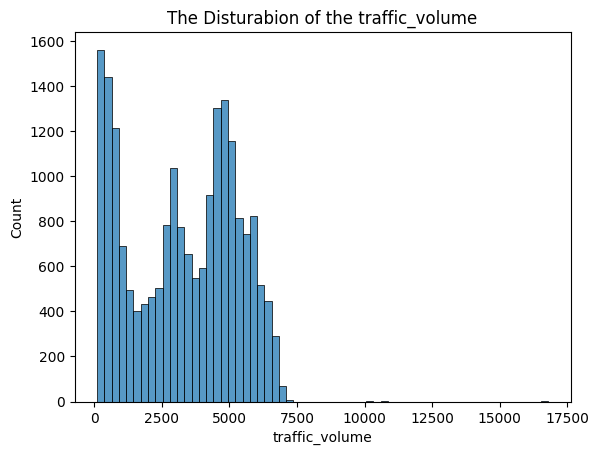

In [ ]:
sns.histplot(data= df, x= df['traffic_volume'])
plt.title(f'The Disturabion of the traffic_volume')
plt.show()

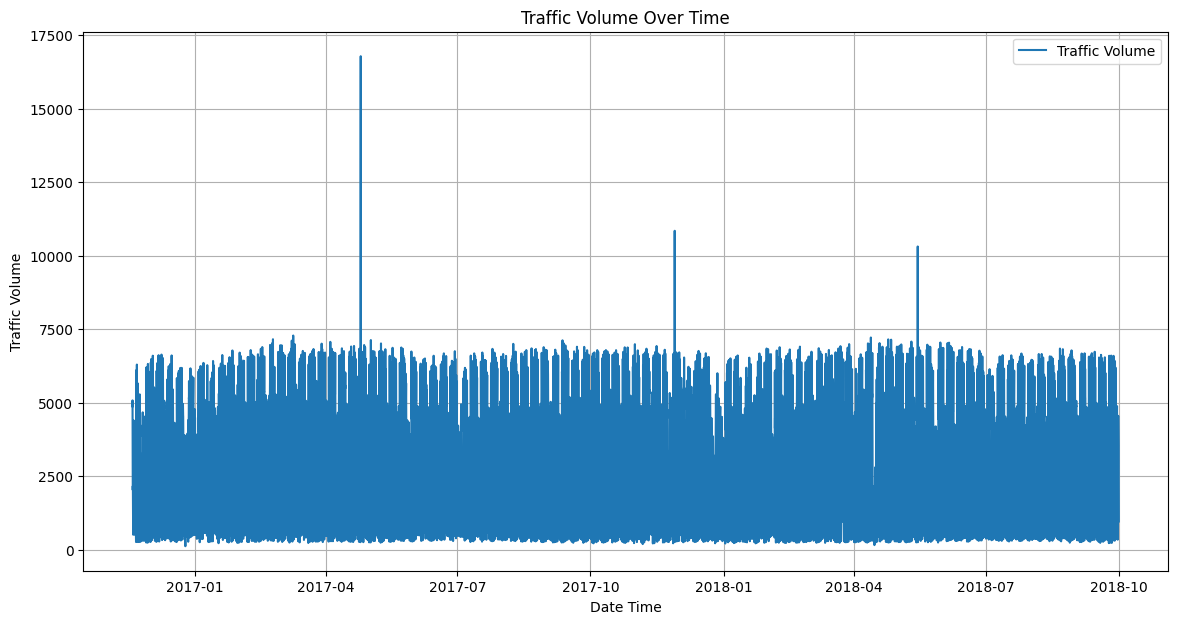

In [ ]:
#Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['traffic_volume'], label='Traffic Volume')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()

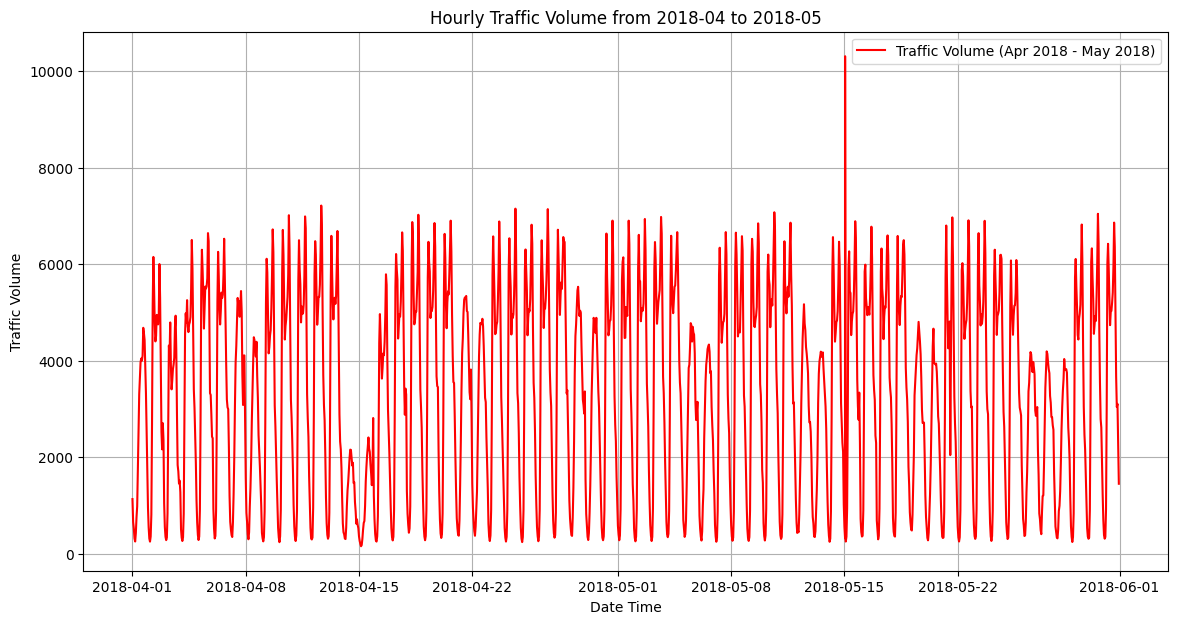

In [ ]:
filtered_data_2 = df.loc['2018-04':'2018-05']

plt.figure(figsize=(14, 7))
plt.plot(filtered_data_2.index, filtered_data_2['traffic_volume'], label='Traffic Volume (Apr 2018 - May 2018)', color='r')
plt.title('Hourly Traffic Volume from 2018-04 to 2018-05')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

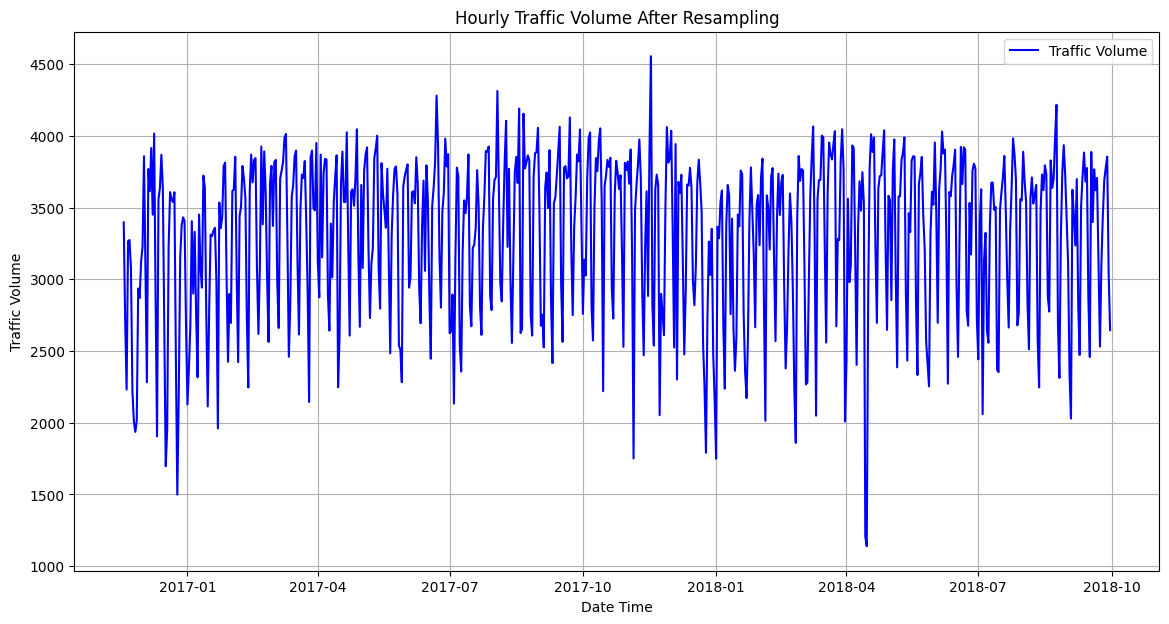

In [ ]:
df_resampled = df_encoded.resample('D').mean()


plt.figure(figsize=(14, 7))
plt.plot(df_resampled.index, df_resampled['traffic_volume'], label='Traffic Volume', color='b')
plt.title('Hourly Traffic Volume After Resampling')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

#Deal with outliers

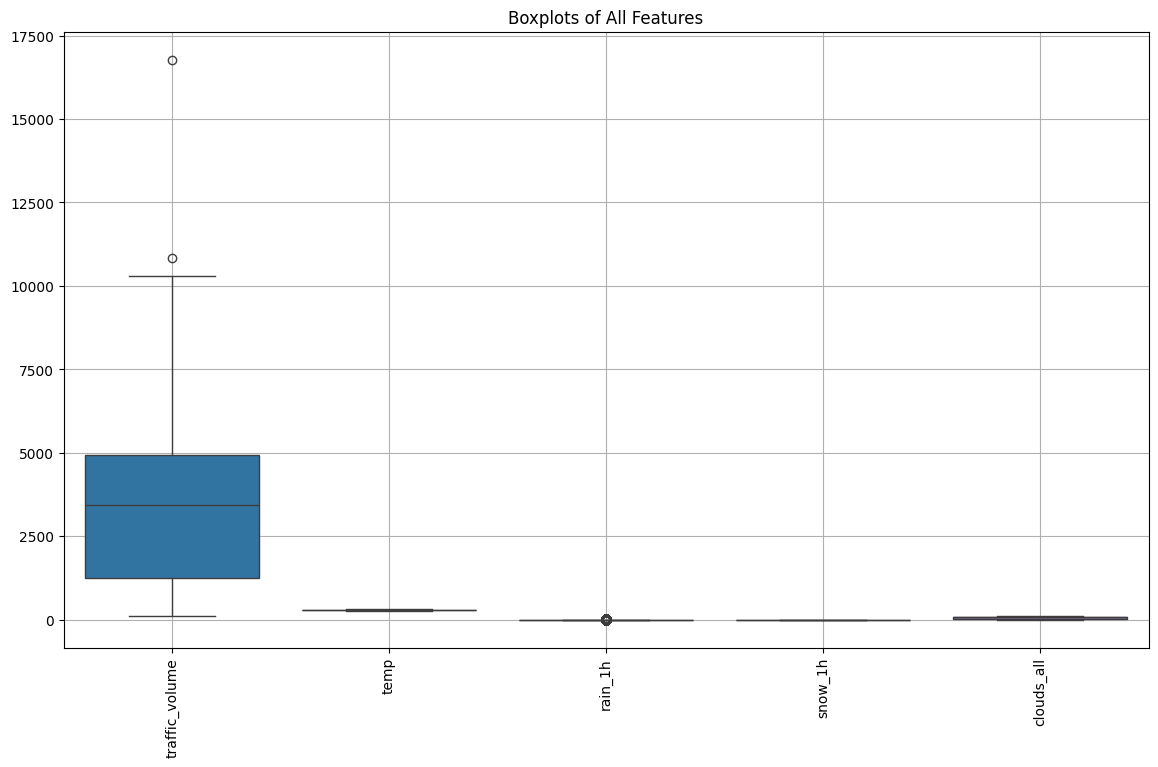

In [ ]:
# Boxplots for all relevant features
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title('Boxplots of All Features')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# Function to calculate the number of outliers using IQR
def calculate_outliers_iqr(df):
    outliers_dict = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers_dict

# Calculate and print the number of outliers
outliers_iqr = calculate_outliers_iqr(df)
print("Number of outliers using IQR for each column:")
for col, count in outliers_iqr.items():
    print(f'{col}: {count}')

Number of outliers using IQR for each column:
traffic_volume: 2
temp: 0
rain_1h: 713
snow_1h: 0
clouds_all: 0


In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

columns_to_check = ['traffic_volume', 'rain_1h']
df_cleaned = remove_outliers(df, columns_to_check)

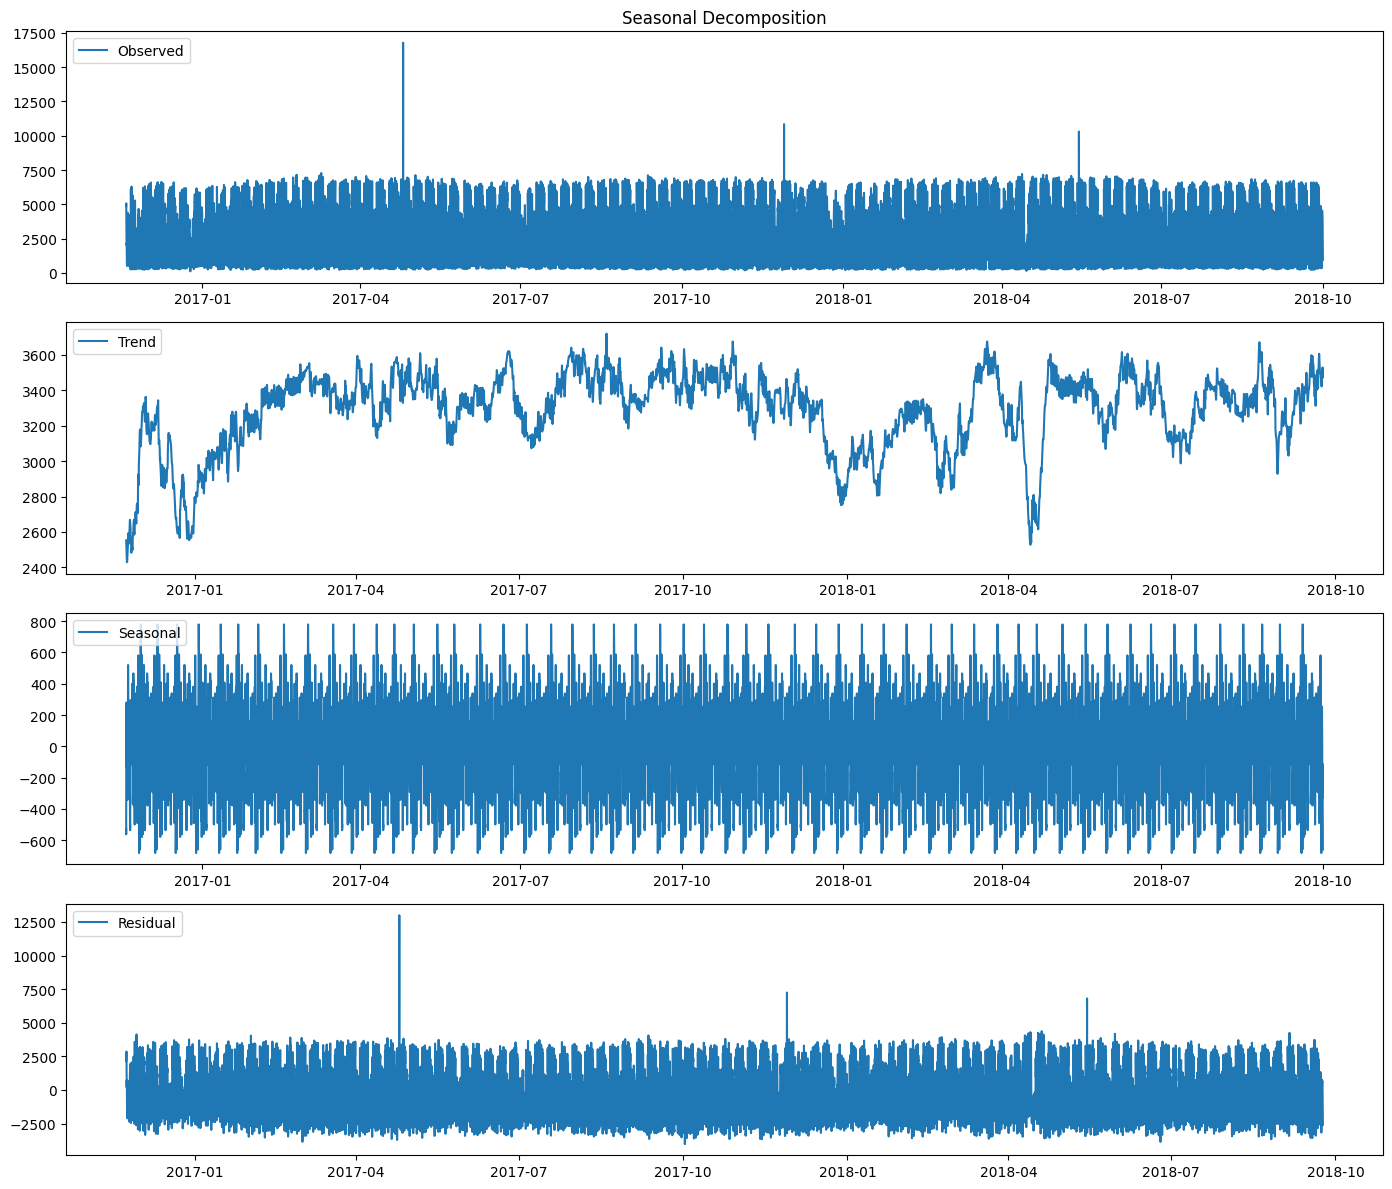

In [ ]:
decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=365)



plt.figure(figsize=(14, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
#Create a feature called lag1, lag2
df['lag1'] = df['traffic_volume'].shift(1)
df['lag2'] = df['traffic_volume'].shift(2)

In [ ]:
#Fill the null values useing Backword
df['lag1'] = df['lag1'].fillna(method='bfill')
df['lag2'] = df['lag2'].fillna(method='bfill')

<ipython-input-26-177f05051064>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['lag1'] = df['lag1'].fillna(method='bfill')
<ipython-input-26-177f05051064>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['lag2'] = df['lag2'].fillna(method='bfill')


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1) #function shifts the values in the traffic volume column by 1 period, creating a new column with the previous day's values.

#Drop the NaN values that my have been created by the shift
df.dropna(inplace=True)

In [ ]:
df['Day_of_Week'] = df.index.dayofweek

df['Month'] = df.index.month

df['Day_of_Year'] = df.index.dayofyear

# Calculate the difference between traffic volume values
df['Diff_traffic_volume'] = df['traffic_volume'].diff()

# Backward rows with NaN values that may have been created by the diff
df.fillna(method='bfill', inplace=True)

<ipython-input-28-1f6ec59e48c8>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
lag1,0
lag2,0
prev_traffic_volume,0
Day_of_Week,0
Month,0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
print(df.index)

DatetimeIndex(['2016-11-18 15:00:00', '2016-11-18 15:00:00',
               '2016-11-18 16:00:00', '2016-11-18 16:00:00',
               '2016-11-18 16:00:00', '2016-11-18 17:00:00',
               '2016-11-18 17:00:00', '2016-11-18 17:00:00',
               '2016-11-18 18:00:00', '2016-11-18 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=19999, freq=None)


In [ ]:
train = df.loc['2016-11-18':'2017-12-30']
test = df.loc['2018-01-01':'2018-06-29']
val = df.loc['2018-07-01':'2018-09-30']
train.shape, test.shape,val.shape

((12026, 12), (5177, 12), (2747, 12))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,lag1,lag2,prev_traffic_volume,Day_of_Week,Month,Day_of_Year,Diff_traffic_volume
count,19999.000000,19999.000000,19999.000000,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,3278.107192,281.163034,0.048398,0.0,49.382569,3278.303102,3278.474211,3278.303102,2.972699,6.287764,176.086554,-0.195910
std,1976.199743,12.661505,0.398017,0.0,39.647292,1976.163537,1976.153372,1976.163537,2.014637,3.423086,104.859277,768.842556
min,113.000000,243.390000,0.000000,0.0,0.000000,113.000000,113.000000,113.000000,0.000000,1.000000,1.000000,-10061.000000
25%,1231.500000,271.950000,0.000000,0.0,1.000000,1232.000000,1232.000000,1232.000000,1.000000,3.000000,88.000000,-404.500000
50%,3426.000000,281.830000,0.000000,0.0,75.000000,3426.000000,3426.000000,3426.000000,3.000000,6.000000,172.000000,0.000000
75%,4926.500000,291.840000,0.000000,0.0,90.000000,4926.500000,4926.500000,4926.500000,5.000000,9.000000,258.000000,255.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000,16781.000000,16781.000000,16781.000000,6.000000,12.000000,366.000000,11164.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

data = df[['traffic_volume']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, seq_length):
    X_, y_ = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        X_.append(x)
        y_.append(y)
    return np.array(X_), np.array(y_)


In [ ]:
seq_length = 60

train_size = int(len(data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.15, verbose=1)


Epoch 1/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9.5757e-04 - val_loss: 0.0010
Epoch 3/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 9.3426e-04 - val_loss: 0.0010
Epoch 4/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 9.4884e-04 - val_loss: 0.0010
Epoch 5/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 8.2764e-04 - val_loss: 9.3627e-04
Epoch 6/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 8.7405e-04 - val_loss: 9.2417e-04
Epoch 7/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 8.6846e-04 - val_loss: 9.1039e-04
Epoch 8/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 7.5214e-04 - val_loss: 9.4434e-04
Epoch 9/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 7.8700e-04 - val_loss: 8.6664e-04
Epoch 10/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 8.5418e-04 - val_loss: 8.7923e-04


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
import math
# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.028147898188071507
0.026504882421278242


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


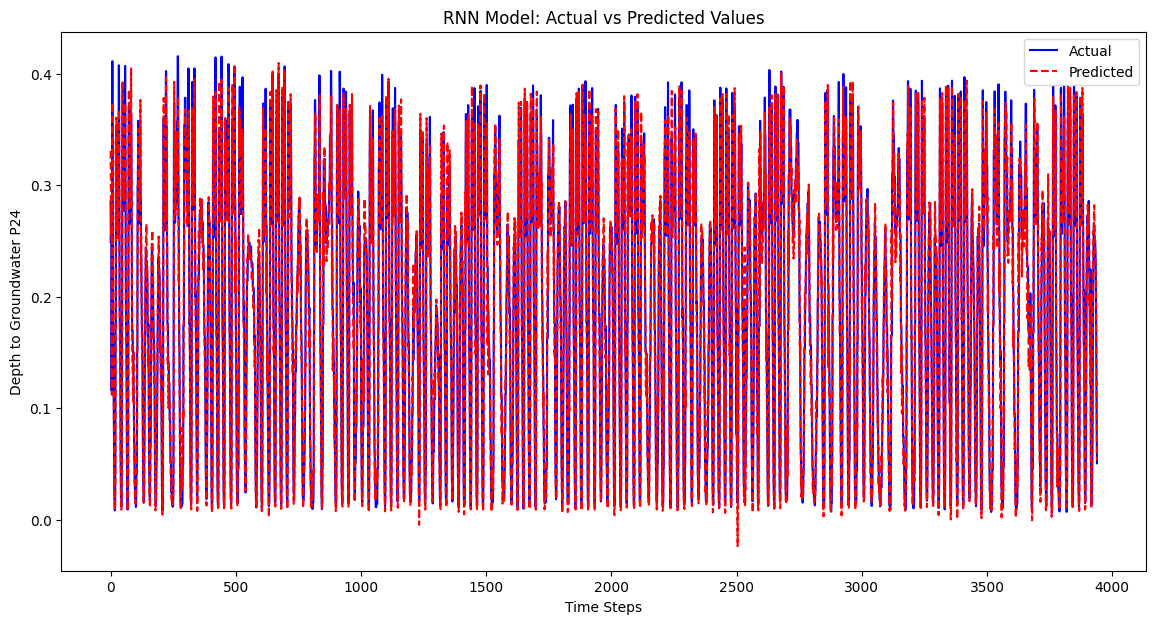

In [ ]:
import matplotlib.pyplot as plt

rnn_predictions = model.predict(X_test)

# Plot the predicted vs actual values for the test set
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(rnn_predictions, color='red', linestyle='dashed', label='Predicted')
plt.title('RNN Model: Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Depth to Groundwater P24')
plt.legend()
plt.show()

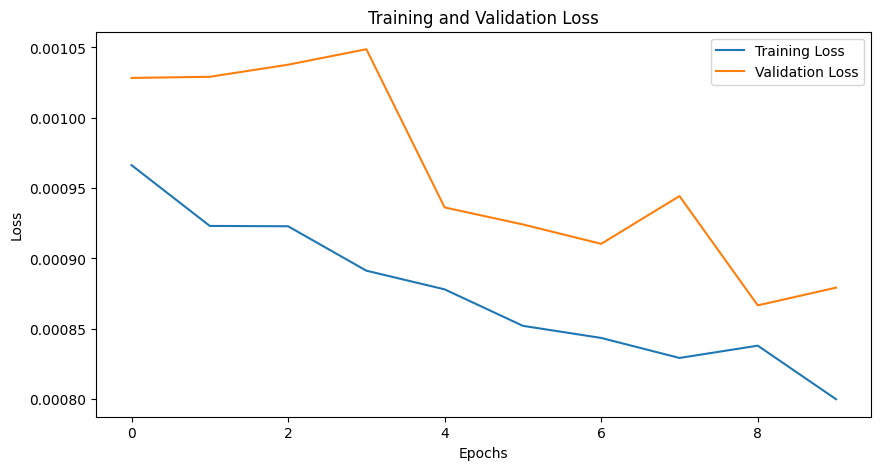

In [ ]:
# Plot the loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

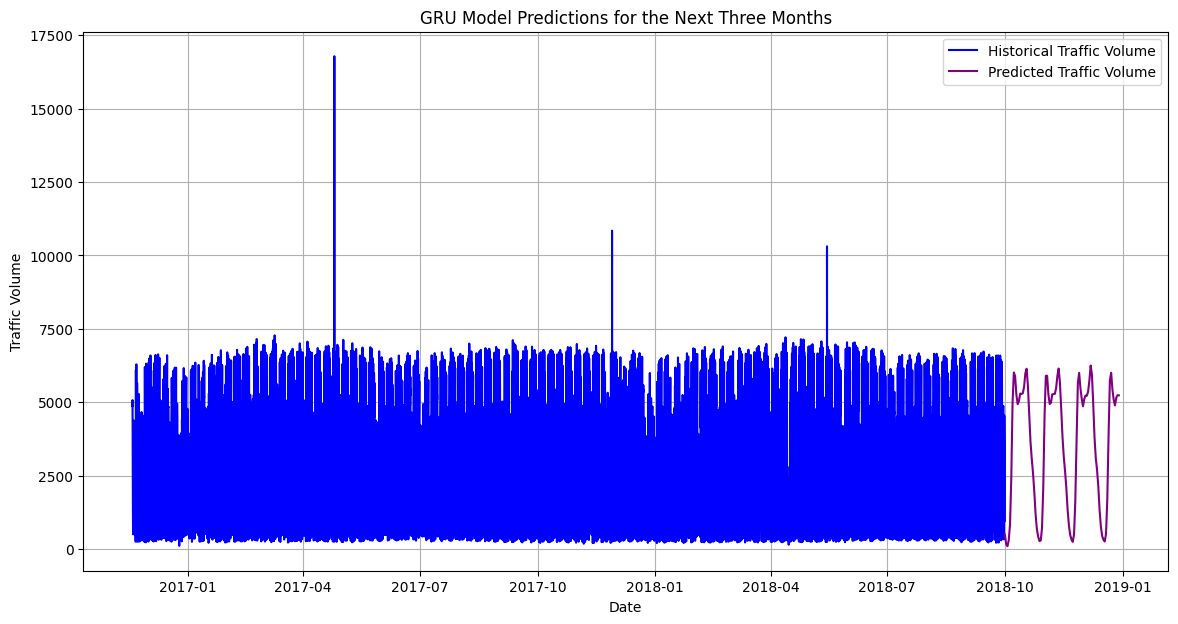

In [ ]:
num_predictions = 3 * 30
last_sequence = scaled_data[-seq_length:]
predictions = []
for _ in range(num_predictions):
    x_input = last_sequence.reshape((1, seq_length, 1))
    next_prediction = model.predict(x_input)
    predictions.append(next_prediction[0, 0])
    last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(-1, 1)), axis=0)

future_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=num_predictions, freq='D')

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['traffic_volume'], label='Historical Traffic Volume', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Traffic Volume', color='purple')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('RNN Model Predictions for the Next Three Months')
plt.legend()
plt.grid(True)

plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout  # Import Dropout

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0105 - val_loss: 0.0043
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0016 - val_loss: 0.0016


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 

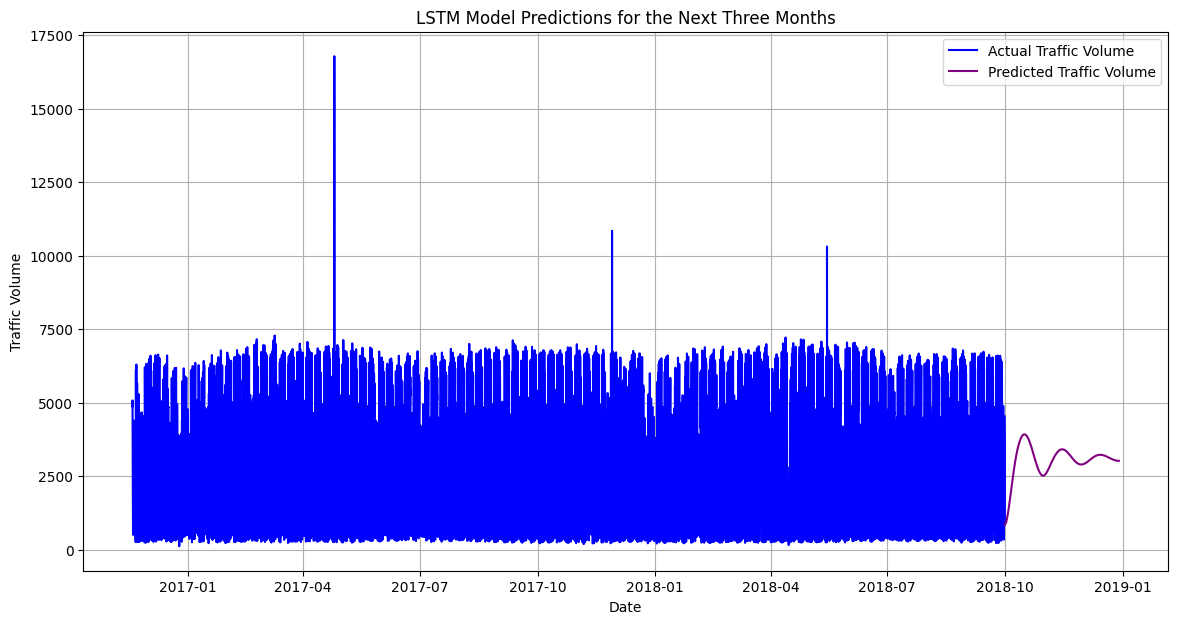

In [ ]:
num_predictions = 3 * 30
last_sequence = scaled_data[-seq_length:]
predictions = []
for _ in range(num_predictions):
    x_input = last_sequence.reshape((1, seq_length, 1))
    next_prediction = model.predict(x_input)
    predictions.append(next_prediction[0, 0])
    last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(-1, 1)), axis=0)

future_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=num_predictions, freq='D')

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['traffic_volume'], label='Actual Traffic Volume', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Traffic Volume', color='purple')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('LSTM Model Predictions for the Next Three Months')
plt.legend()
plt.grid(True)
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: